<body>
     <h1> <b> Generalidades </b> <br> <i> Overview </i> <br> Análisis Exploratorio de Datos <br> <i> Exploratory Data Analysis </i> </h1>
     <p> Los archivos fuentes utilizados fueron: <br>
     <i> The source files used were: </i>
     </p> 
</body>

[Datos Sintéticos <br> <i> Synthetic Data </i>](/data/external/nb1300.csv) <br>
<br>
[Datos Reales de la Máquina <br> <i> Current Machine Data </i>](/data/external/data_transformed_NB1300_FV27Sep2022.csv)


<body>
     <h1> <b> Características Preliminares de las Fuentes de Datos </b> <br> <i> Data Source Properties </i> </h1>
     <p>
     Los datasets disponibles corresponden ha información que caracteríza la operación de un "Diesel Rotary UPS", el cual posee cuatro (4) modos de operaión: <br>
     <i> The available datasets have the information to model the operation of a Diesel Rotary UPS, which has four (4) operation modes: </i> <br>
     <h2>  <b> Modos de Operación </b> <br> <i> Modes of Operation </i> </h2>
     <ol>
          <li> Modo de Acondicionamiento </li>
          <i> Conditioning Mode </i>
          <li> Modo Independiente </li>
          <i> Independent Mode </i>
          <li> Modo de Transferencia (del modo de acondicionado al modo independiente) </li>
          <i> Transfer From Conditioning Mode To Independent Mode </i>
          <li> Retorno al Suministro Principal de Voltaje: Volver al modo de Acondicionamiento </li>
          <i> Mains Return : Back To Conditioning Mode </i>
     </ol>
     </p>
</body>

| [![space-1.jpg](https://greenpowerintl.com/wp-content/uploads/2022/07/drups-1.jpg)](https://www.youtube.com/watch?v=y9l1Wn7v4uk) |
| :------------------------------------------------------------------------------------------------------------------------------: |
|                                     <b> Diagrama "Diesel Rotary UPS" (Clíck en la Imagen) </b> <br> <i> Diagram "Diesel Rotary UPS" (Click on the image ) </i>                                  |


---

<body>
     <h1> <b> Imoportación de la Librerías Requeridas </b> <br> <i> Import Require Dependencies </i> </h1>
</body>


In [57]:
# Importamos las librerías requeridas/ Import require dependencies
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly as plotly
%matplotlib inline
sns.set()


---

<body>
     <h1> <b> Carga de los Datos en Dataframes </b> <br> <i> Set the Data </i> </h1>
</body>


In [58]:
# Declarar los argumentos para cargar los datos en datasets: Datos Sintéticos 
# / Define arguments to read the data: Synthetic Data.
# Filepath.
dir_path01 = "../data/external/nb1300.csv"
# Encoding.
enc01 = "utf-8"
# Separator.
sep01 = ","

# Instanciar el dataframe (df)/ Read data
synt_data_df = pd.read_csv(
    filepath_or_buffer=dir_path01, sep=sep01, encoding=enc01)

# Inspeccionar el df/ Inspect df
synt_data_df.head()


Time_Stamp  NB1300Vibracion1  NB1300Vibracion2  NB1300Vibracion3  \
0  10/3/2022 19:48               2.3               2.0               2.5   
1  10/3/2022 19:48               1.8               2.1               2.7   
2  10/3/2022 19:48               1.4               2.6               2.7   
3  10/3/2022 19:48               1.0               2.7               2.6   
4  10/3/2022 19:48               2.3               2.3               2.5   

   NB1300Vibracion4  NB1300Vibracion5  NB1300Vibracion6  NB1300Prec  \
0               2.7               2.3               2.9        44.1   
1               2.5               2.6               2.3        40.2   
2               2.0               2.9               2.7        44.5   
3               2.1               2.1               2.0        37.9   
4               2.1               2.5               2.4        44.3   

   NB1300tGener  NB1300tCuarto  NB1300tBloque  NB1300tAmbien  NB1300hCuarto  \
0          36.7           26.3           34.0           21.2           38.4   
1          32.0           27.9           36.0           14.7           27.4   
2          35.1           25.7           37.0           23.0           42.2   
3          32.8           27.5           46.7           17.6           36.9   
4          32.2           27.4           32.7           21.0           30.4   

   NB1300tRuedaL  NB1300tEscobillas  NB1300PQA01CorrP  NB1300pqa01VoltP  \
0           38.9               43.9              12.0             440.0   
1           35.4               40.5              12.9             439.4   
2           37.7               33.9              13.0             441.3   
3           38.0               37.3              12.4             443.4   
4           33.6               36.2              13.4             440.5   

   NB1300EstadoFalla  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [59]:
# Declarar los argumentos para cargar los datos en datasets: Datos Reales de la Máquina 
# / Define arguments to read the data: Current Machine Data.
# Filepath.
dir_path02 = "../data/external/data_transformed_NB1300_FV27Sep2022.csv"
# Encoding.
enc02 = "utf-8"
# Separator.
sep02 = ","

# Instanciar el df/ Read data
real_data_df = pd.read_csv(
    filepath_or_buffer=dir_path02, sep=sep02, encoding=enc02)

# Inspeccionar el df/ Inspect df
real_data_df.head()


Time_Stamp  NB1300Vibracion1  NB1300Vibracion2  NB1300Vibracion3  \
0  7/27/2022 15:37               2.6               3.6               4.1   
1  7/27/2022 15:38               2.5               4.5               4.7   
2  7/27/2022 15:39               2.1               3.1               3.7   
3  7/27/2022 15:40               2.8               3.8               4.4   
4  7/27/2022 15:41               2.3               3.3               3.7   

   NB1300Vibracion4  NB1300Vibracion5  NB1300Vibracion6  NB1300tPrec  \
0               4.6               4.0               3.7           45   
1               4.6               4.5               5.2           46   
2               3.5               3.1               3.6           46   
3               4.7               3.9               4.4           46   
4               3.9               4.2               3.6           43   

   NB1300tGener  NB1300tCuarto  NB1300tBloque  NB1300tAmbien  NB1300hCuarto  
0            42             26             43             25             29  
1            41             27             43             26             29  
2            42             26             43             26             29  
3            39             27             43             25             29  
4            36             26             39             21             31

In [60]:
# Definir función para graficar la frecuencia de las señales 
# /Define function to plot signal frequncy
def plot_frequency(df: object, time_stamp: str, signal: float) -> object:
    """This function plots the frequency of the signals received by the sensors.

    Args:
        df (object): dataframe object.
        time_stamp (str): Signal time stamp as str
        signal (float): Input magnitude measured by the sensor

    Returns:
        object: Frequency chart
    """
    df_max_signal = df[[f"{time_stamp}", f"{signal}"]].groupby(
        f"{time_stamp}").max().reset_index()
    df_max_signal[f"{signal}"].hist(bins=15, figsize=(15, 7))
    print(f"{signal} frequency")
    plt.xlabel(f"{signal}")
    plt.ylabel("frequency")
    plt.show()


---
<body>
     <h2> <b> Fuente de Datos: Datos Sínteticos <br> </b> <i> Data Source: Synthetic Data </i> </h2>
</body>


In [61]:
# Inspeccionar estadísticas del df/ Inspect df statistics
synt_data_df.describe().transpose()


count        mean       std    min    25%    50%    75%  \
NB1300Vibracion1   86400.0    1.966441  0.611703    1.0    1.5    2.0    2.5   
NB1300Vibracion2   86400.0    2.462409  0.335352    2.0    2.2    2.5    2.7   
NB1300Vibracion3   86400.0    2.462029  0.337146    2.0    2.2    2.5    2.7   
NB1300Vibracion4   86400.0    2.462078  0.334814    2.0    2.2    2.5    2.7   
NB1300Vibracion5   86400.0    2.461726  0.333022    2.0    2.2    2.5    2.7   
NB1300Vibracion6   86400.0    2.461628  0.335515    2.0    2.2    2.5    2.7   
NB1300Prec         86400.0   41.017551  2.413559   37.0   39.0   41.0   43.0   
NB1300tGener       86400.0   35.495927  2.065441   32.0   33.7   35.5   37.2   
NB1300tCuarto      86400.0   25.462309  1.469801   23.0   24.2   25.4   26.7   
NB1300tBloque      86400.0   40.037678  4.712893   32.0   36.0   40.0   44.1   
NB1300tAmbien      86400.0   18.506546  3.791987   12.0   15.2   18.5   21.8   
NB1300hCuarto      86400.0   33.562777  6.761091   22.0   27.7   33.5   39.3   
NB1300tRuedaL      86400.0   40.014110  4.713925   32.0   35.9   40.0   44.1   
NB1300tEscobillas  86400.0   40.031647  4.714498   32.0   35.9   40.0   44.1   
NB1300PQA01CorrP   86400.0   12.961167  0.596242   12.0   12.5   13.0   13.5   
NB1300pqa01VoltP   86400.0  440.451635  7.739324  435.0  437.5  440.0  442.5   
NB1300EstadoFalla  86400.0    0.006146  0.078155    0.0    0.0    0.0    0.0   

                     max  
NB1300Vibracion1     5.9  
NB1300Vibracion2     5.9  
NB1300Vibracion3     5.9  
NB1300Vibracion4     5.9  
NB1300Vibracion5     5.9  
NB1300Vibracion6     5.9  
NB1300Prec          54.9  
NB1300tGener        43.9  
NB1300tCuarto       29.9  
NB1300tBloque       55.9  
NB1300tAmbien       26.9  
NB1300hCuarto       54.9  
NB1300tRuedaL       55.9  
NB1300tEscobillas   55.9  
NB1300PQA01CorrP    15.9  
NB1300pqa01VoltP   599.6  
NB1300EstadoFalla    1.0

In [62]:
# Inspeccionar tipo de dato de los sensores/ Inspect sensor dtypes
synt_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time_Stamp         86400 non-null  object 
 1   NB1300Vibracion1   86400 non-null  float64
 2   NB1300Vibracion2   86400 non-null  float64
 3   NB1300Vibracion3   86400 non-null  float64
 4   NB1300Vibracion4   86400 non-null  float64
 5   NB1300Vibracion5   86400 non-null  float64
 6   NB1300Vibracion6   86400 non-null  float64
 7   NB1300Prec         86400 non-null  float64
 8   NB1300tGener       86400 non-null  float64
 9   NB1300tCuarto      86400 non-null  float64
 10  NB1300tBloque      86400 non-null  float64
 11  NB1300tAmbien      86400 non-null  float64
 12  NB1300hCuarto      86400 non-null  float64
 13  NB1300tRuedaL      86400 non-null  float64
 14  NB1300tEscobillas  86400 non-null  float64
 15  NB1300PQA01CorrP   86400 non-null  float64
 16  NB1300pqa01VoltP   864

In [63]:
# Identificar variables categóricas y numércias/ Identifie cateorical and numerical vars
num_vars = synt_data_df.columns[synt_data_df.dtypes != "object"]
cat_vars = synt_data_df.columns[synt_data_df.dtypes == "object"]

print("Variables numericas:")
for var in num_vars:
    print(f"\t{var}")
print("\n")

print("Variables categóricas:")
for var in cat_vars:
    print(f"\t{var}")


Variables numericas:
	NB1300Vibracion1
	NB1300Vibracion2
	NB1300Vibracion3
	NB1300Vibracion4
	NB1300Vibracion5
	NB1300Vibracion6
	NB1300Prec
	NB1300tGener
	NB1300tCuarto
	NB1300tBloque
	NB1300tAmbien
	NB1300hCuarto
	NB1300tRuedaL
	NB1300tEscobillas
	NB1300PQA01CorrP
	NB1300pqa01VoltP
	NB1300EstadoFalla


Variables categóricas:
	Time_Stamp


In [64]:
# Identificar registros vacíos/ Identifie empty values
synt_data_df.isna().sum()


Time_Stamp           0
NB1300Vibracion1     0
NB1300Vibracion2     0
NB1300Vibracion3     0
NB1300Vibracion4     0
NB1300Vibracion5     0
NB1300Vibracion6     0
NB1300Prec           0
NB1300tGener         0
NB1300tCuarto        0
NB1300tBloque        0
NB1300tAmbien        0
NB1300hCuarto        0
NB1300tRuedaL        0
NB1300tEscobillas    0
NB1300PQA01CorrP     0
NB1300pqa01VoltP     0
NB1300EstadoFalla    0
dtype: int64

In [65]:
# Identificar registros nulos/ Identifie null values
synt_data_df.isnull().sum()


Time_Stamp           0
NB1300Vibracion1     0
NB1300Vibracion2     0
NB1300Vibracion3     0
NB1300Vibracion4     0
NB1300Vibracion5     0
NB1300Vibracion6     0
NB1300Prec           0
NB1300tGener         0
NB1300tCuarto        0
NB1300tBloque        0
NB1300tAmbien        0
NB1300hCuarto        0
NB1300tRuedaL        0
NB1300tEscobillas    0
NB1300PQA01CorrP     0
NB1300pqa01VoltP     0
NB1300EstadoFalla    0
dtype: int64

In [66]:
# Agrupar df por "Time_Stamp"/ Df grouped by "Time_Stamp"
synt_data_df.groupby("Time_Stamp").max().reset_index().head()


Time_Stamp  NB1300Vibracion1  NB1300Vibracion2  NB1300Vibracion3  \
0  10/3/2022 19:48               2.8               2.9               2.9   
1  10/3/2022 19:49               2.9               2.9               2.9   
2  10/3/2022 19:50               2.9               2.9               2.9   
3  10/3/2022 19:51               2.9               2.9               2.9   
4  10/3/2022 19:52               2.9               2.9               2.9   

   NB1300Vibracion4  NB1300Vibracion5  NB1300Vibracion6  NB1300Prec  \
0               2.9               2.9               2.9        44.5   
1               2.9               2.9               2.9        44.9   
2               2.9               2.9               2.9        44.9   
3               2.9               2.9               2.9        44.9   
4               2.9               2.9               2.9        44.7   

   NB1300tGener  NB1300tCuarto  NB1300tBloque  NB1300tAmbien  NB1300hCuarto  \
0          38.9           27.9           46.8           24.4           44.8   
1          38.9           27.8           47.7           24.9           44.0   
2          38.8           27.9           47.9           24.6           43.6   
3          38.6           27.9           47.8           24.9           44.9   
4          38.5           27.9           47.8           24.9           44.7   

   NB1300tRuedaL  NB1300tEscobillas  NB1300PQA01CorrP  NB1300pqa01VoltP  \
0           47.3               46.3              13.9             444.6   
1           47.8               47.9              13.9             444.9   
2           47.7               47.8              13.8             444.9   
3           47.3               47.9              13.9             444.8   
4           47.7               47.7              13.9             444.6   

   NB1300EstadoFalla  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

NB1300Vibracion1 frequency


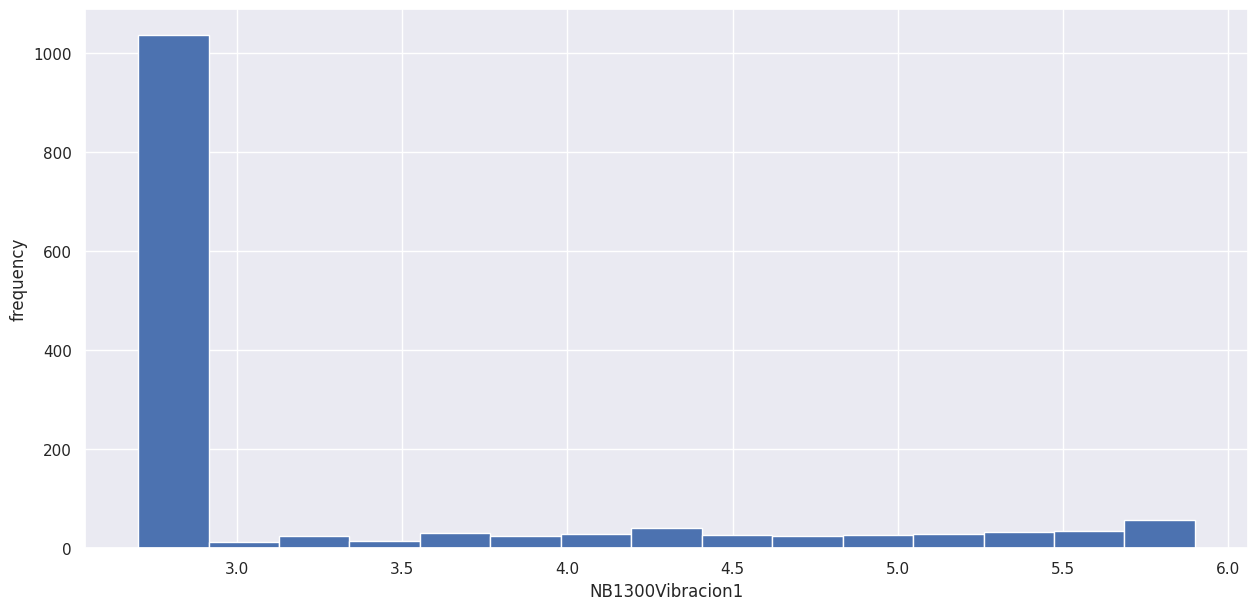

NB1300Vibracion2 frequency


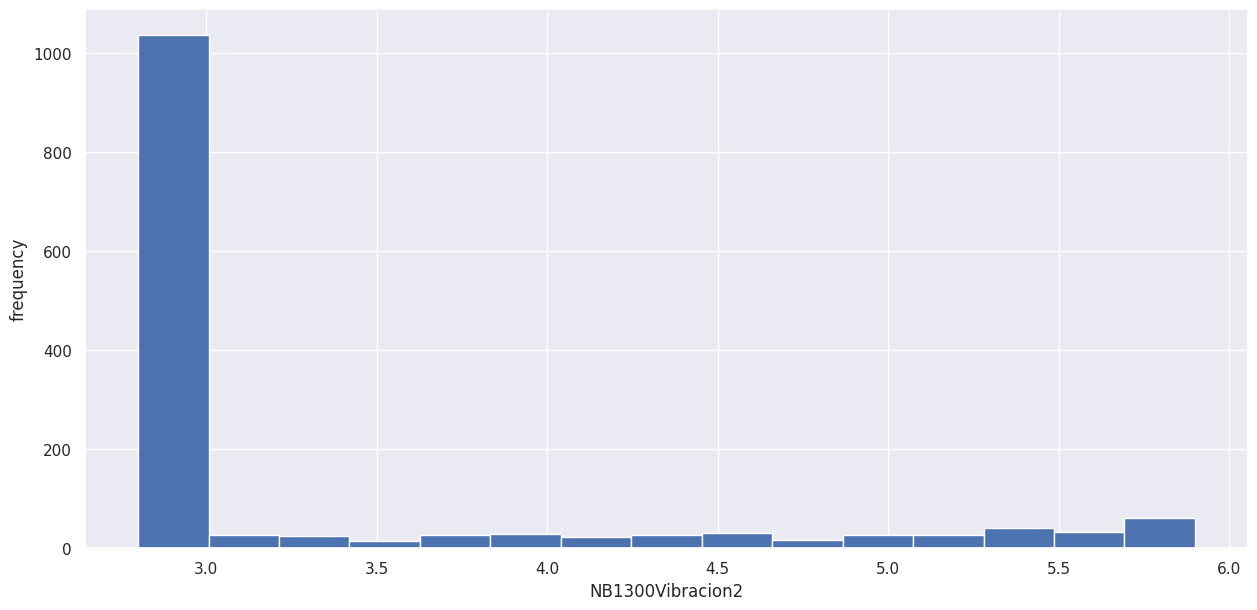

NB1300Vibracion3 frequency


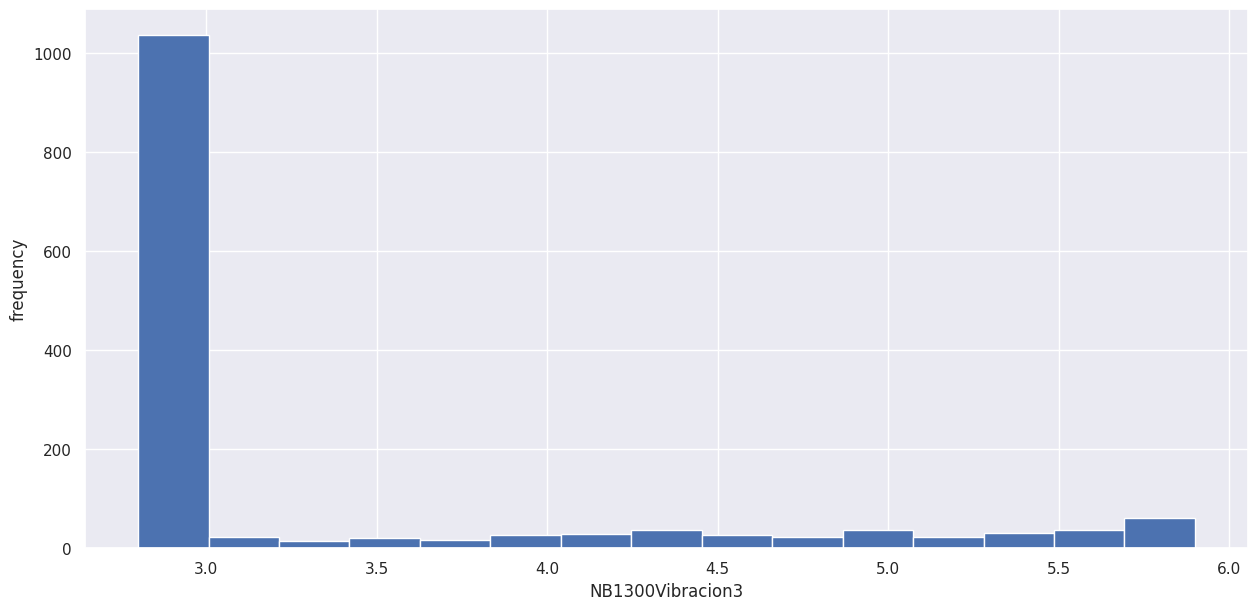

NB1300Vibracion4 frequency


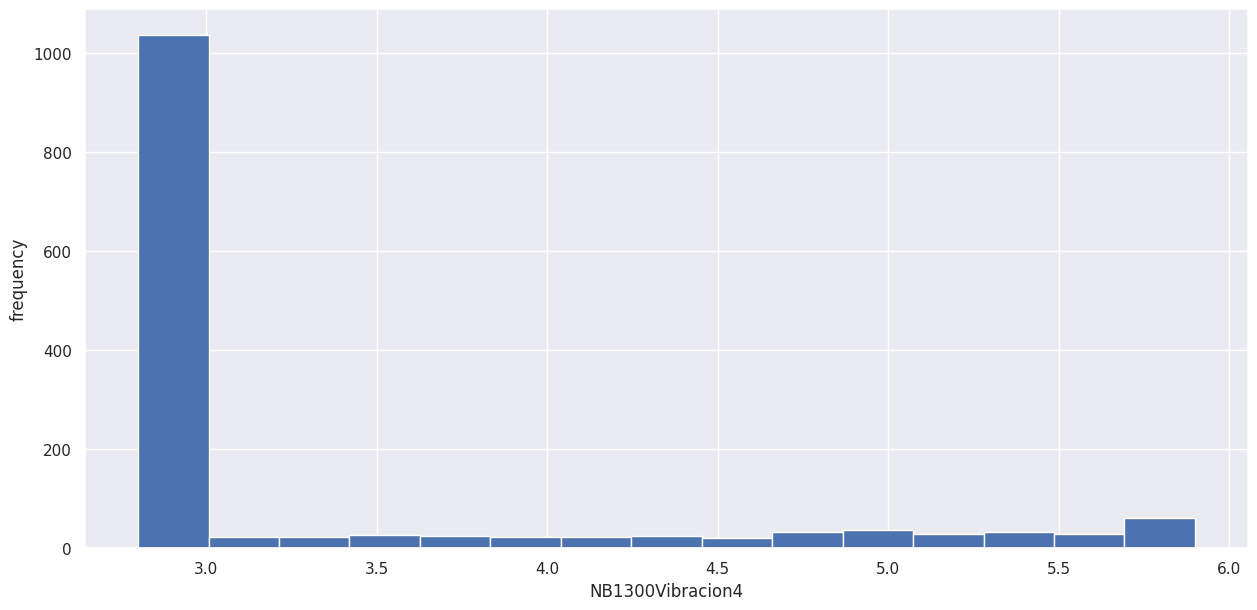

NB1300Vibracion5 frequency


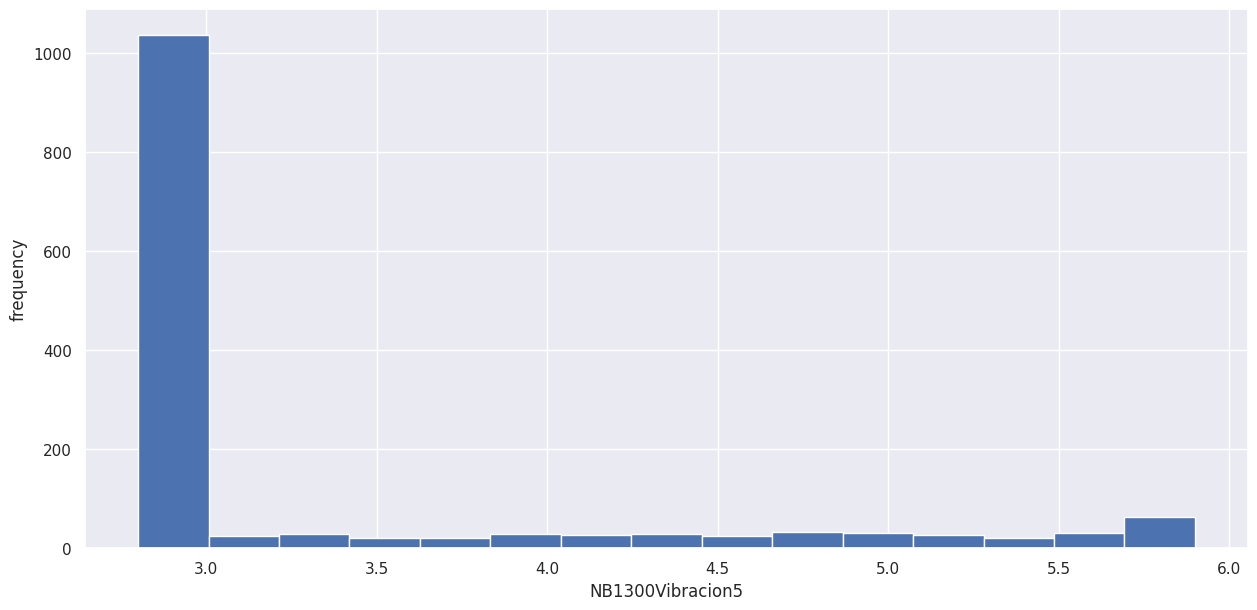

NB1300Vibracion6 frequency


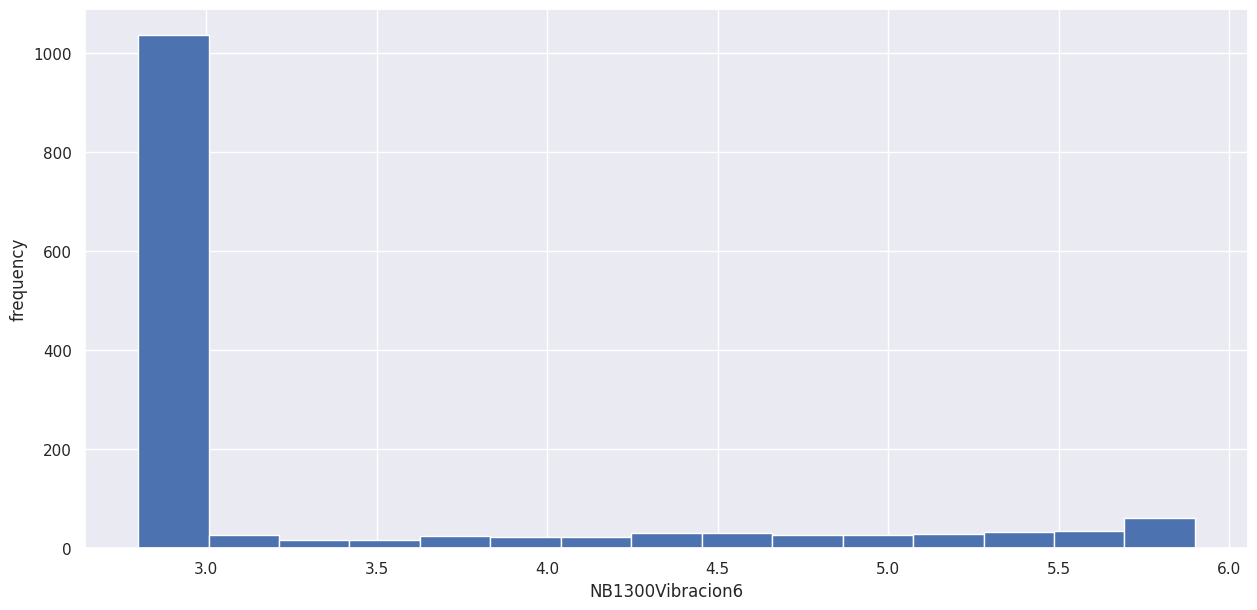

NB1300Prec frequency


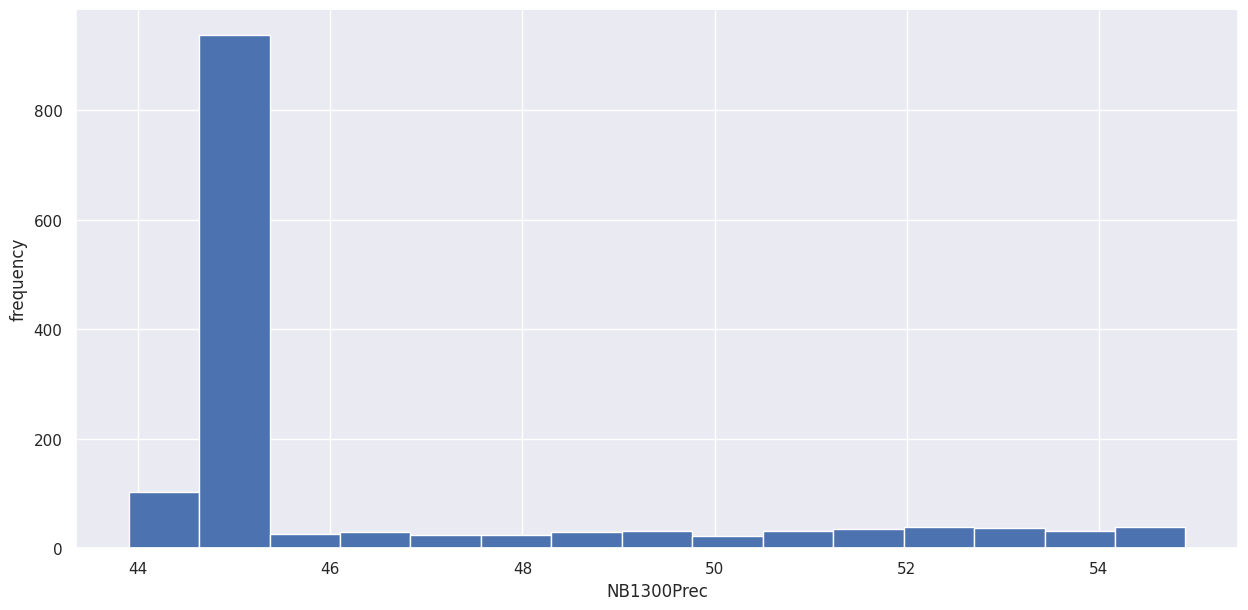

NB1300tGener frequency


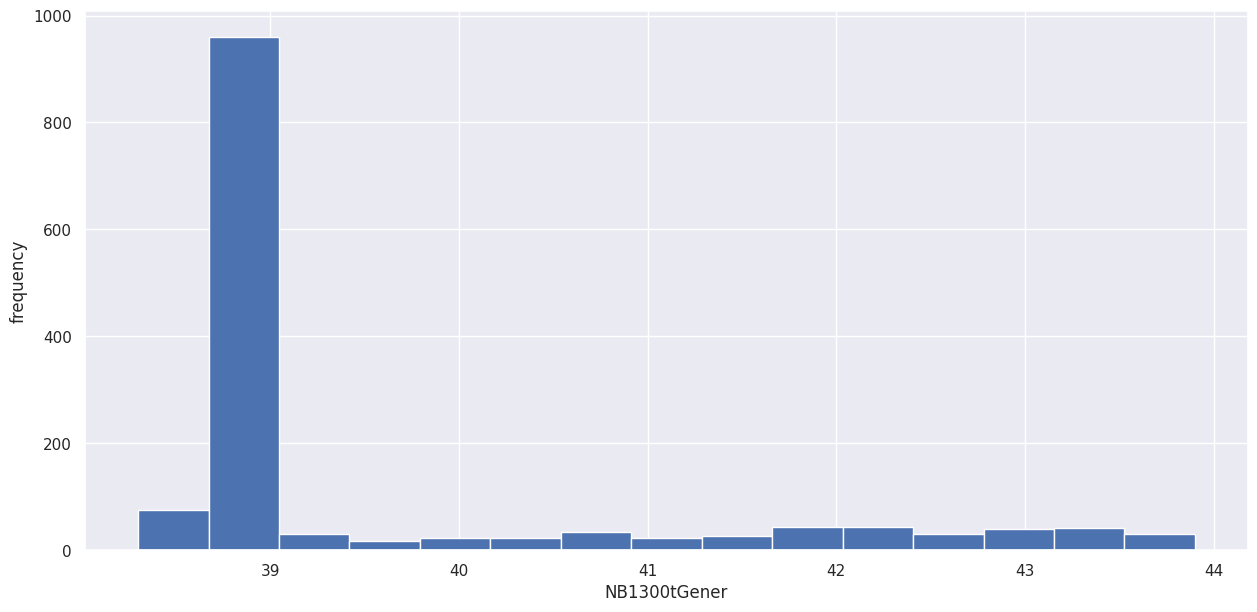

NB1300tCuarto frequency


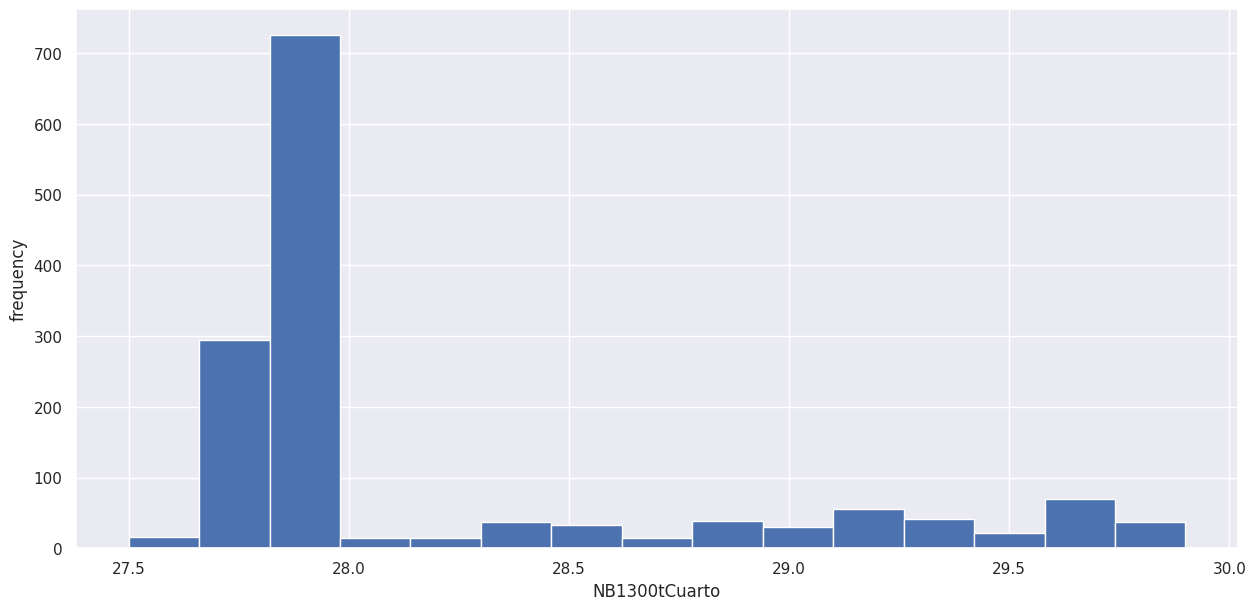

NB1300tBloque frequency


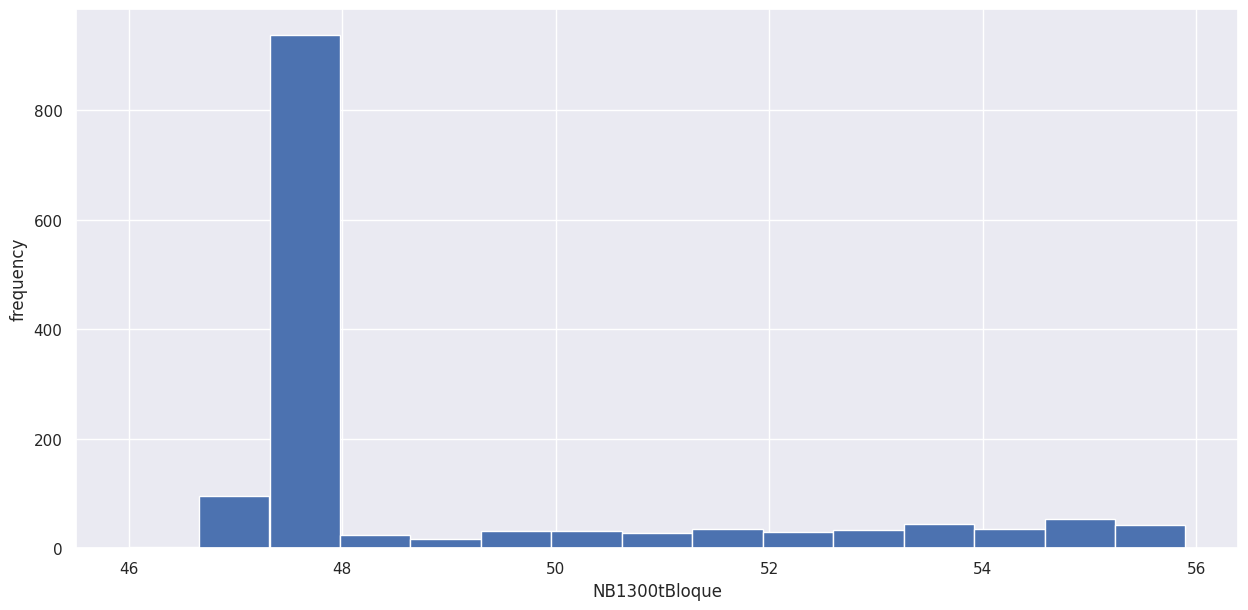

NB1300tAmbien frequency


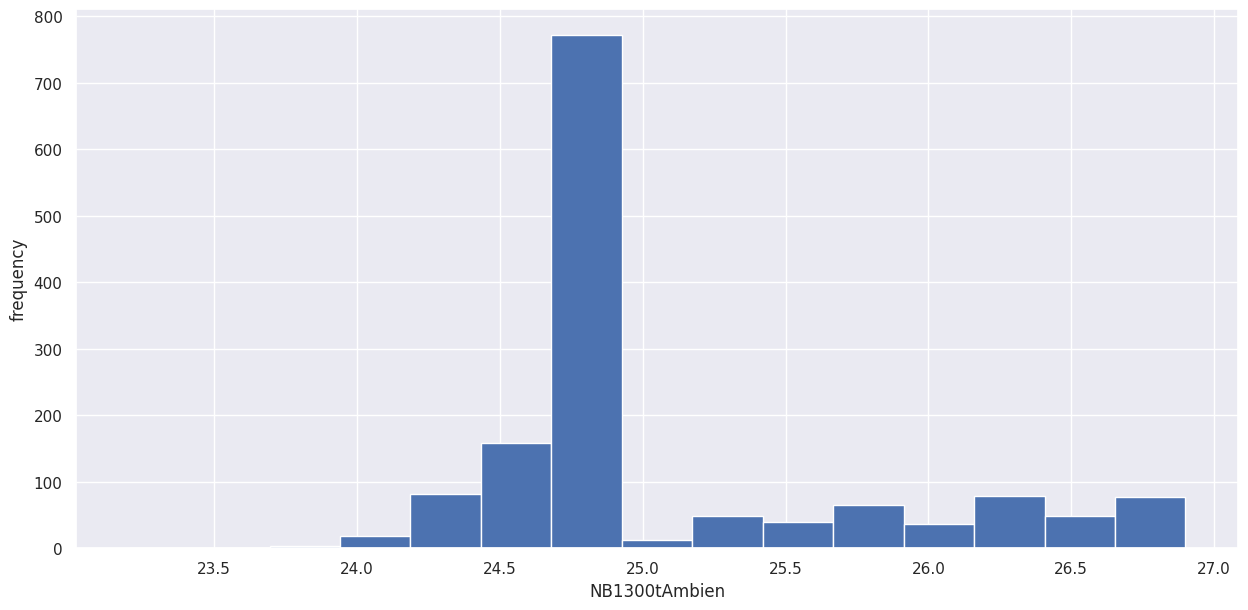

NB1300hCuarto frequency


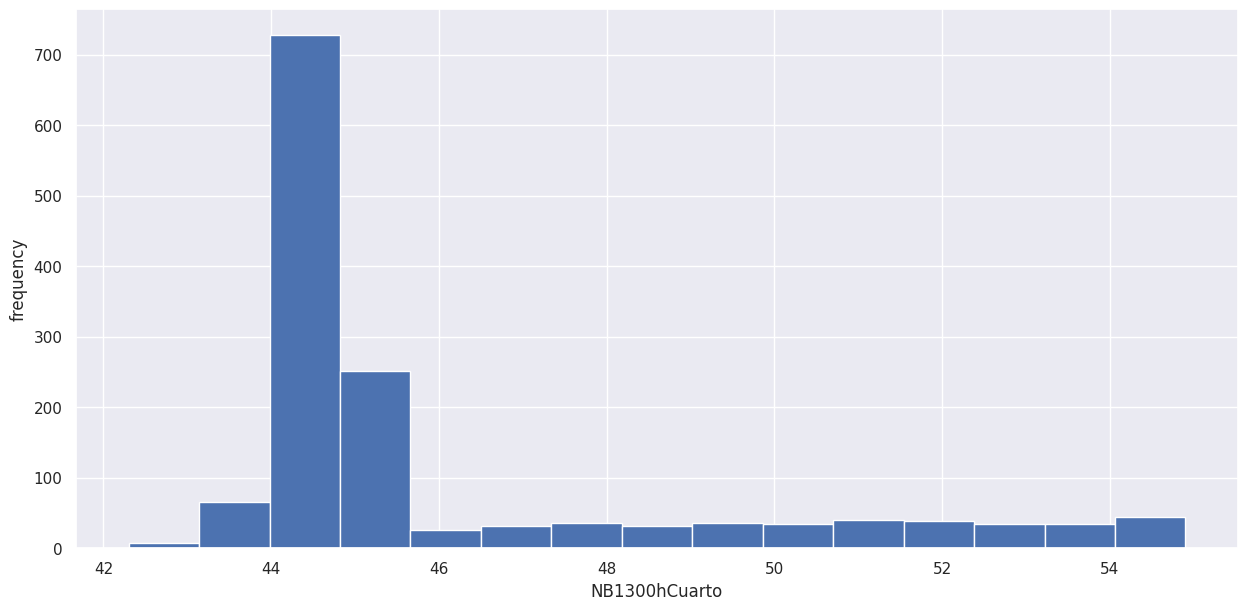

NB1300tRuedaL frequency


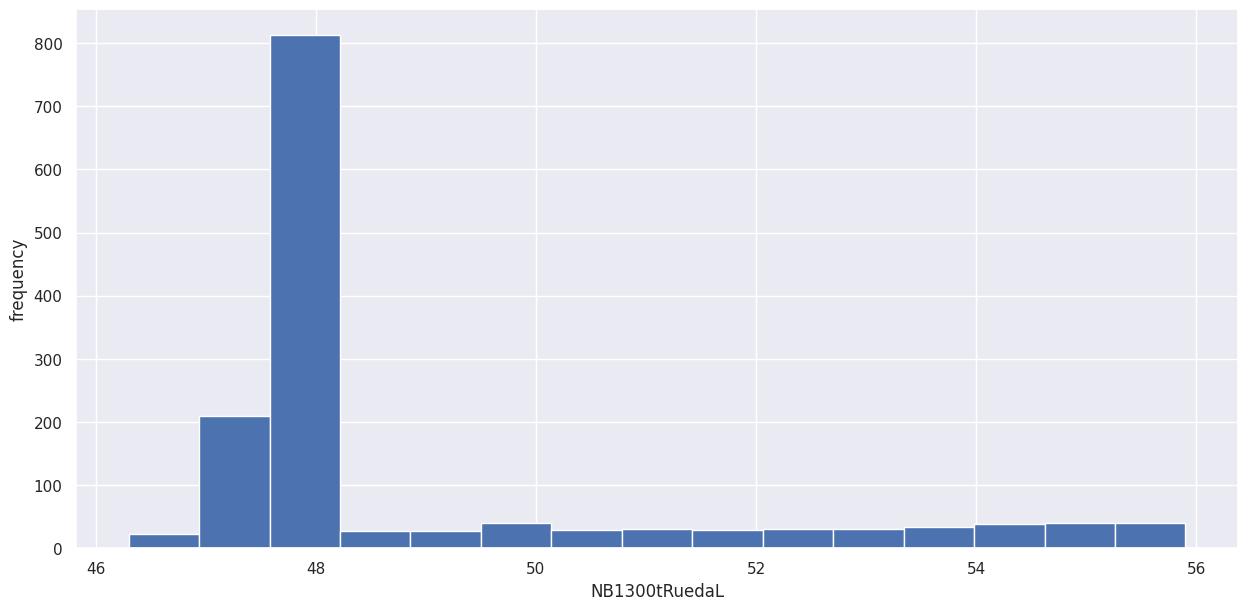

NB1300tEscobillas frequency


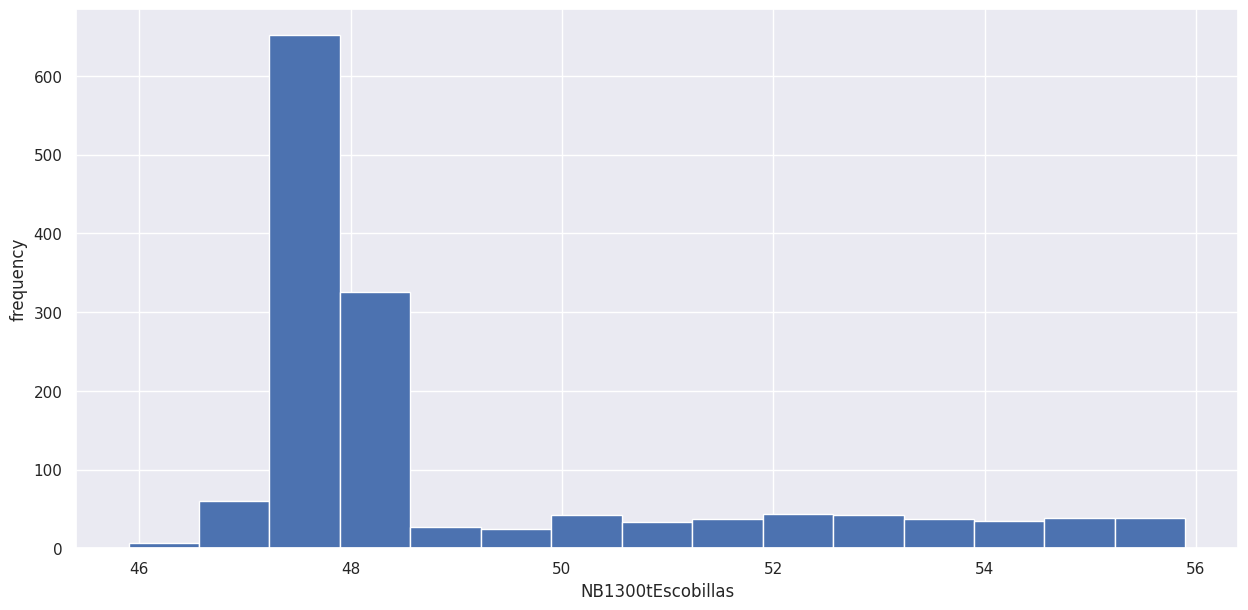

NB1300PQA01CorrP frequency


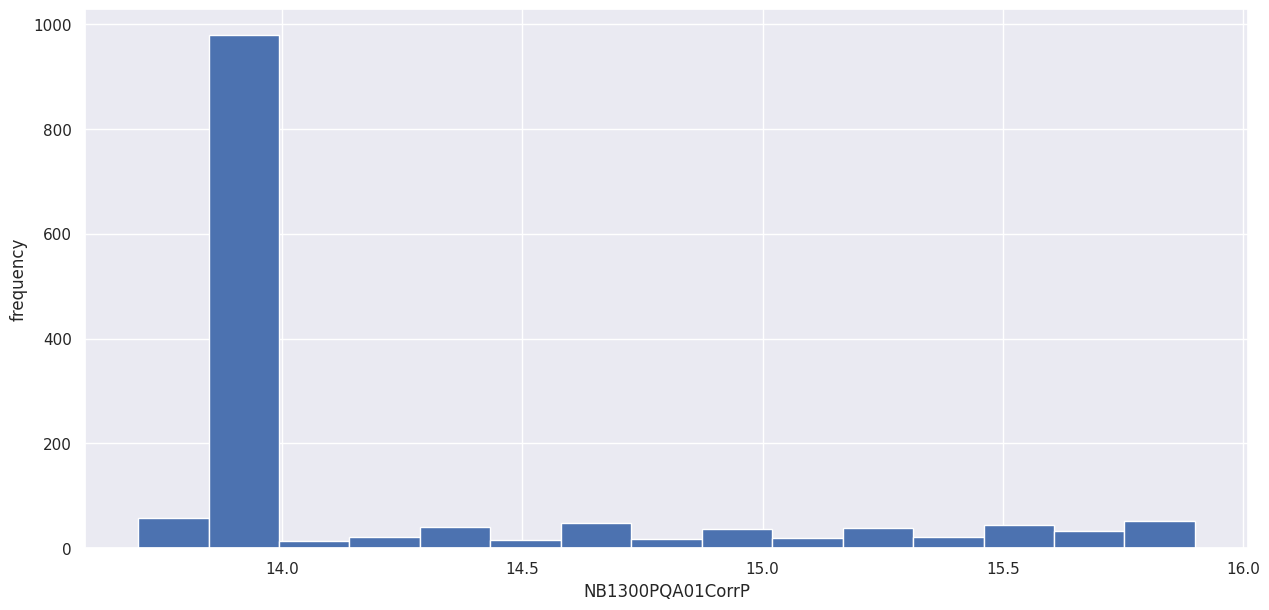

NB1300pqa01VoltP frequency


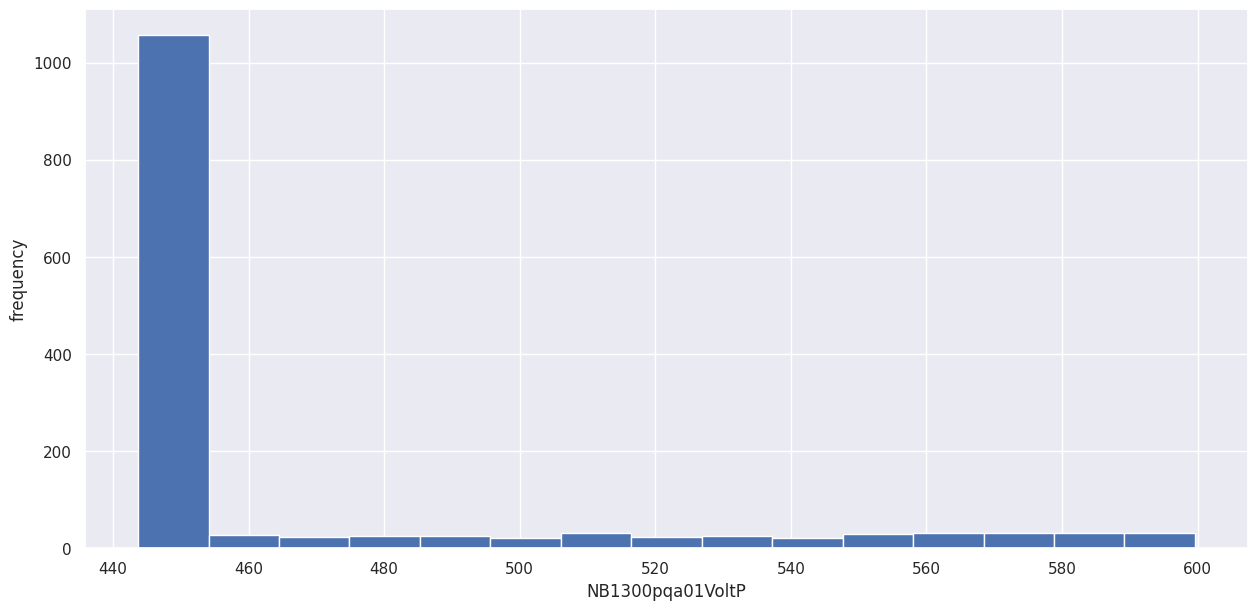

NB1300EstadoFalla frequency


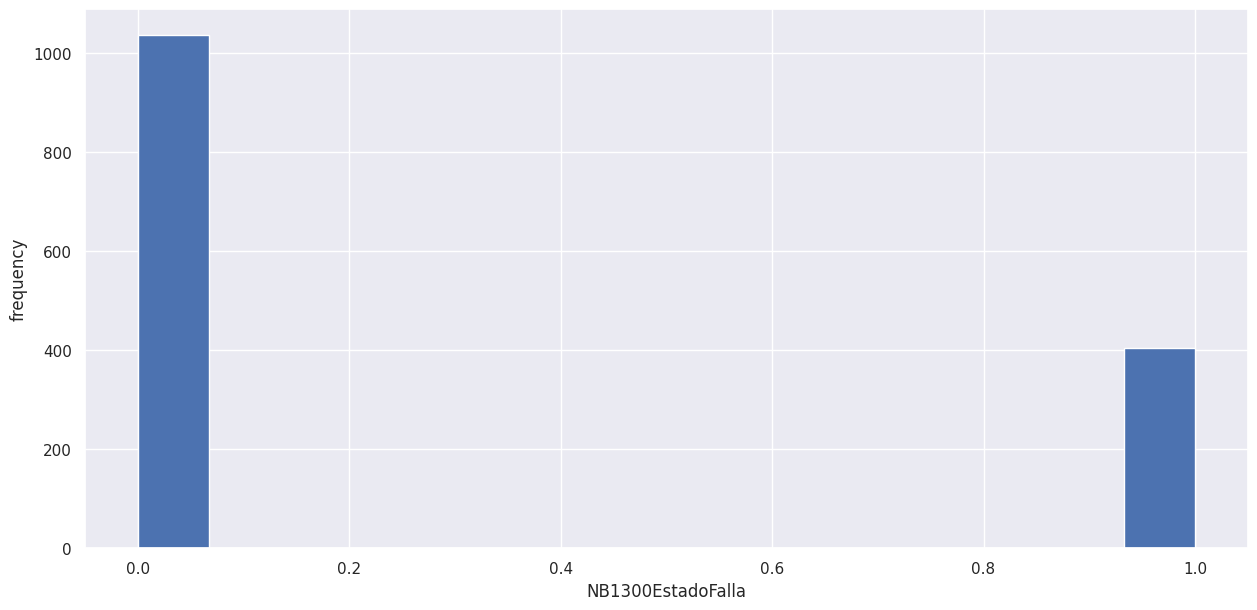

In [67]:
# Graicar la frecuencia de las señales/ Plot signal frequncy
TIME_STAMP = "Time_Stamp"
SIGNAL = [
    "NB1300Vibracion1",
    "NB1300Vibracion2",
    "NB1300Vibracion3",
    "NB1300Vibracion4",
    "NB1300Vibracion5",
    "NB1300Vibracion6",
    "NB1300Prec",
    "NB1300tGener",
    "NB1300tCuarto",
    "NB1300tBloque",
    "NB1300tAmbien",
    "NB1300hCuarto",
    "NB1300tRuedaL",
    "NB1300tEscobillas",
    "NB1300PQA01CorrP",
    "NB1300pqa01VoltP",
    "NB1300EstadoFalla"
]
for sensor_signal in SIGNAL:
    plot_frequency(df=synt_data_df, time_stamp=TIME_STAMP,
                   signal=sensor_signal)


In [68]:
# Examinar serie temporal/ Time series examination
x1 = synt_data_df['Time_Stamp']
y1 = synt_data_df['NB1300Vibracion1']
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='NB1300Vibracion1'
)
data = [trace1]
layout = go.Layout(
    title='NB1300Vibracion1 Vs Time_Stamp',
    yaxis=dict(
        title='NB1300Vibracion1'
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')


In [69]:
# Instanciar df/ Instance df
df = synt_data_df.groupby("Time_Stamp").max().reset_index()


In [70]:
# Examinar serie temporal/ Time series examination
x1 = df['Time_Stamp']
y1 = df['NB1300Vibracion1']
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='NB1300Vibracion1'
)
data = [trace1]
layout = go.Layout(
    title='NB1300Vibracion1 Vs Time_Stamp',
    yaxis=dict(
        title='NB1300Vibracion1'
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')


In [71]:
# Examinar serie temporal/ Time series examination
x1 = df['Time_Stamp']
y1 = df['NB1300Vibracion1']
z1 = df['NB1300EstadoFalla']
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='NB1300Vibracion1'
)
trace2 = go.Scatter(
    x=x1,
    y=z1,
    name='Failure',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='NB1300Vibracion1 Vs Failure',
    yaxis=dict(
        title='NB1300Vibracion1'
    ),
    yaxis2=dict(
        title='Failure',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')


---
<body>
     <h2> <b> Fuente de Datos: Datos Reales de la Máquina </b> <br>
     <i> Data Source: Current Machine Data </i> </h2>
</body>


In [72]:
# Inspeccionar estadísticas del df/ Inspect df statistics
real_data_df.describe().transpose()


count       mean       std   min   25%   50%   75%   max
NB1300Vibracion1  18750.0   2.494400  0.402086   1.0   2.2   2.5   2.8   6.0
NB1300Vibracion2  18750.0   3.539200  0.535635   2.0   3.2   3.5   3.9   6.0
NB1300Vibracion3  18750.0   4.036795  0.623450   2.0   3.6   4.0   4.4   6.6
NB1300Vibracion4  18750.0   4.037584  0.621504   2.0   3.6   4.0   4.4   6.5
NB1300Vibracion5  18750.0   4.041531  0.623192   2.0   3.6   4.0   4.4   6.4
NB1300Vibracion6  18750.0   4.043120  0.622426   2.0   3.6   4.0   4.4   6.2
NB1300tPrec       18750.0  43.388053  2.802916  37.0  41.0  44.0  46.0  55.0
NB1300tGener      18750.0  38.796267  2.499002  32.0  37.0  39.0  41.0  44.0
NB1300tCuarto     18750.0  25.306933  1.684398  23.0  24.0  25.0  27.0  30.0
NB1300tBloque     18750.0  39.694133  3.331322  32.0  37.0  40.0  43.0  56.0
NB1300tAmbien     18750.0  21.162080  2.967425  12.0  19.0  22.0  23.0  27.0
NB1300hCuarto     18750.0  29.484587  3.516084  22.0  28.0  29.0  30.0  55.0

In [73]:
# Inspeccionar tipo de dato de los sensores/ Inspect sensor dtypes
real_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18750 entries, 0 to 18749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time_Stamp        18750 non-null  object 
 1   NB1300Vibracion1  18750 non-null  float64
 2   NB1300Vibracion2  18750 non-null  float64
 3   NB1300Vibracion3  18750 non-null  float64
 4   NB1300Vibracion4  18750 non-null  float64
 5   NB1300Vibracion5  18750 non-null  float64
 6   NB1300Vibracion6  18750 non-null  float64
 7   NB1300tPrec       18750 non-null  int64  
 8   NB1300tGener      18750 non-null  int64  
 9   NB1300tCuarto     18750 non-null  int64  
 10  NB1300tBloque     18750 non-null  int64  
 11  NB1300tAmbien     18750 non-null  int64  
 12  NB1300hCuarto     18750 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.9+ MB


In [74]:
# Identificar variables categóricas y numércias/ Identifie cateorical and numerical vars
num_vars = real_data_df.columns[real_data_df.dtypes != "object"]
cat_vars = real_data_df.columns[real_data_df.dtypes == "object"]

print("Variables numericas:")
for var in num_vars:
    print(f"\t{var}")
print("\n")

print("Variables categóricas:")
for var in cat_vars:
    print(f"\t{var}")


Variables numericas:
	NB1300Vibracion1
	NB1300Vibracion2
	NB1300Vibracion3
	NB1300Vibracion4
	NB1300Vibracion5
	NB1300Vibracion6
	NB1300tPrec
	NB1300tGener
	NB1300tCuarto
	NB1300tBloque
	NB1300tAmbien
	NB1300hCuarto


Variables categóricas:
	Time_Stamp


In [75]:
# Identificar registros vacíos/ Identifie empty values
real_data_df.isna().sum()


Time_Stamp          0
NB1300Vibracion1    0
NB1300Vibracion2    0
NB1300Vibracion3    0
NB1300Vibracion4    0
NB1300Vibracion5    0
NB1300Vibracion6    0
NB1300tPrec         0
NB1300tGener        0
NB1300tCuarto       0
NB1300tBloque       0
NB1300tAmbien       0
NB1300hCuarto       0
dtype: int64

In [76]:
# Identificar registros nulos/ Identifie null values
real_data_df.isnull().sum()


Time_Stamp          0
NB1300Vibracion1    0
NB1300Vibracion2    0
NB1300Vibracion3    0
NB1300Vibracion4    0
NB1300Vibracion5    0
NB1300Vibracion6    0
NB1300tPrec         0
NB1300tGener        0
NB1300tCuarto       0
NB1300tBloque       0
NB1300tAmbien       0
NB1300hCuarto       0
dtype: int64

In [ ]:
# Agrupar df por "Time_Stamp"/ Df grouped by "Time_Stamp"
real_data_df.groupby("Time_Stamp").max().reset_index().head()


NB1300Vibracion1 frequency


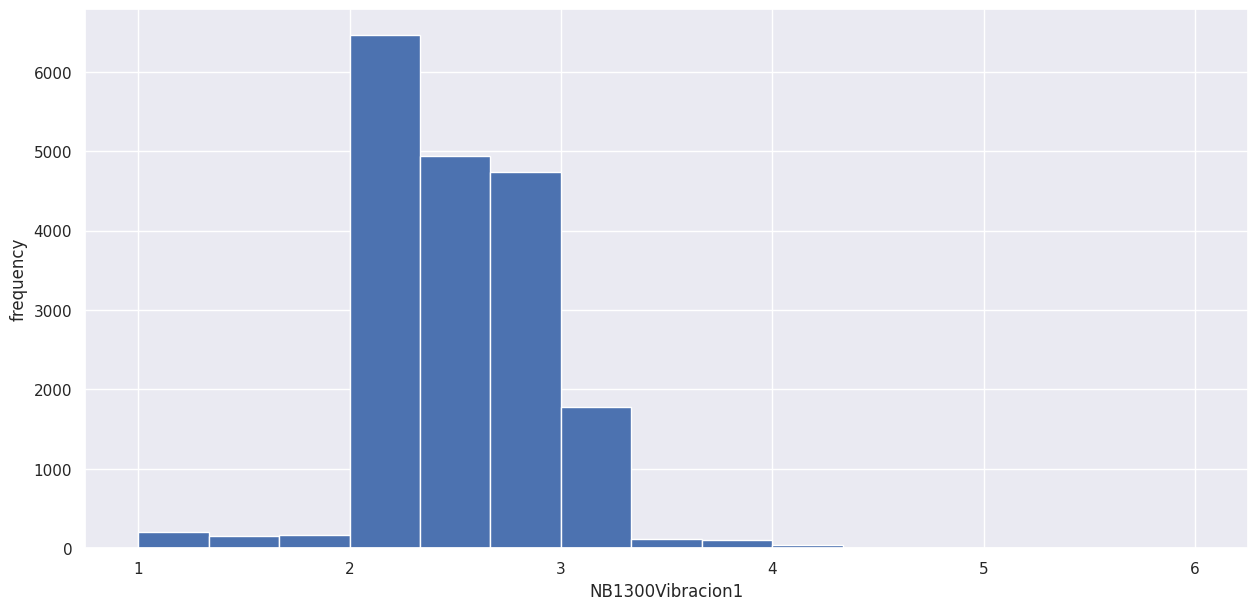

NB1300Vibracion2 frequency


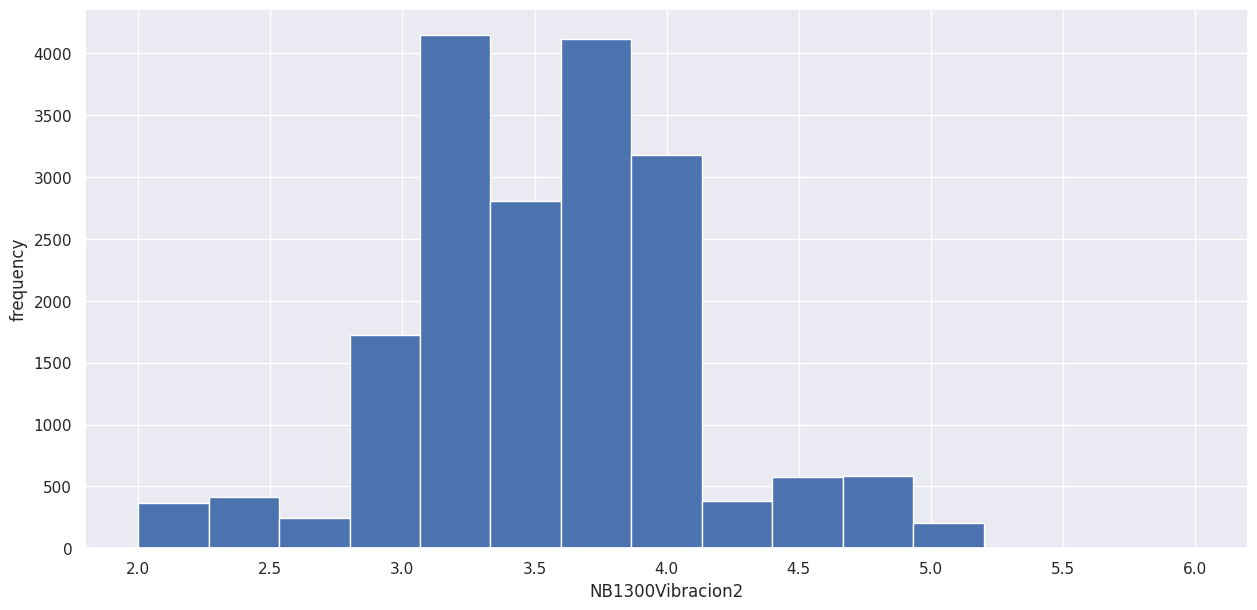

NB1300Vibracion3 frequency


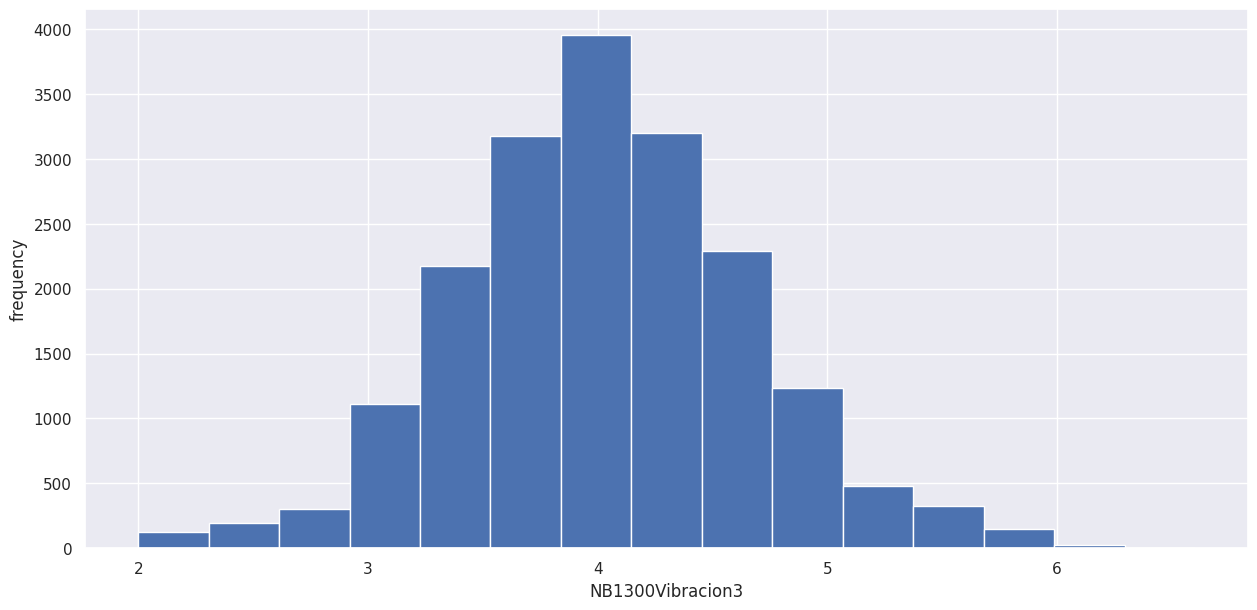

NB1300Vibracion4 frequency


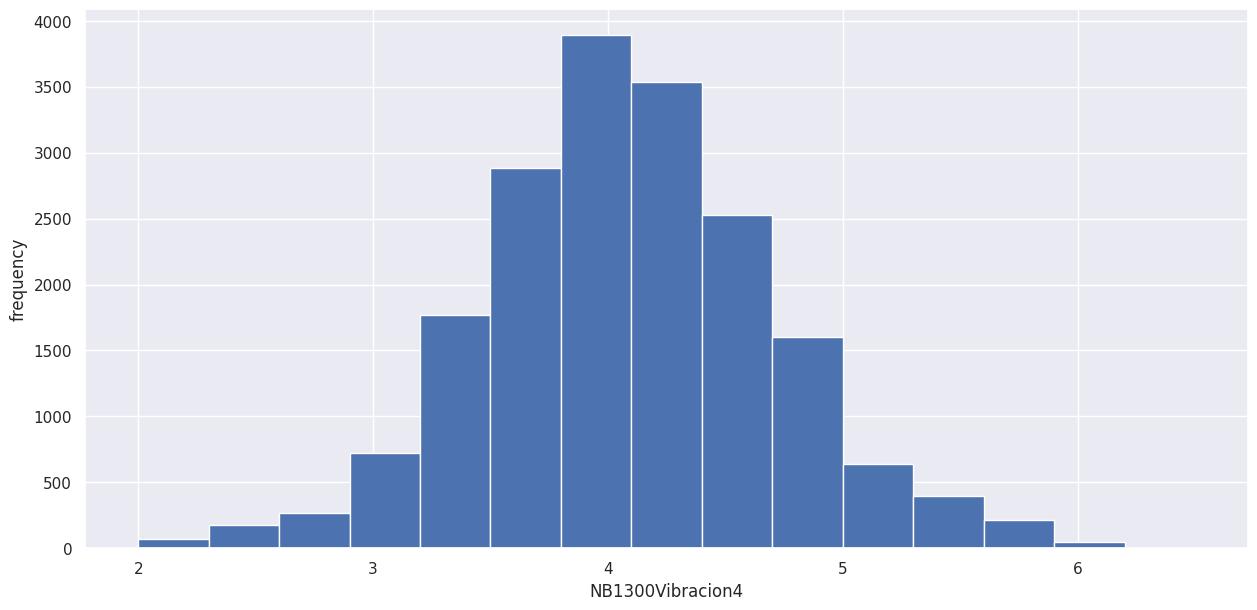

NB1300Vibracion5 frequency


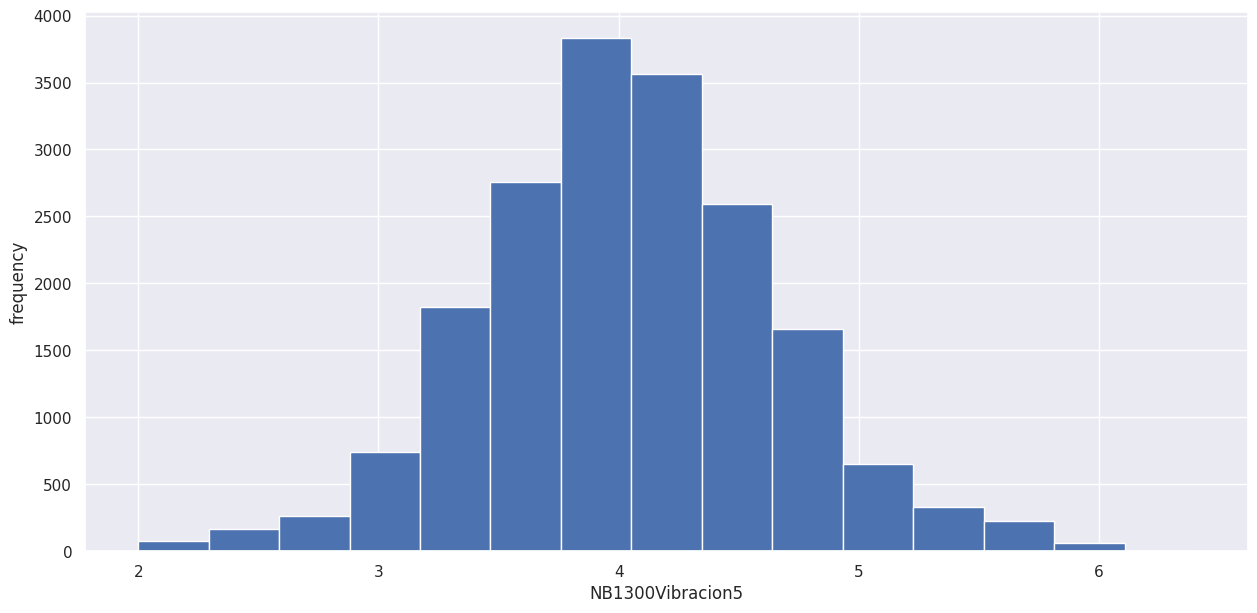

NB1300Vibracion6 frequency


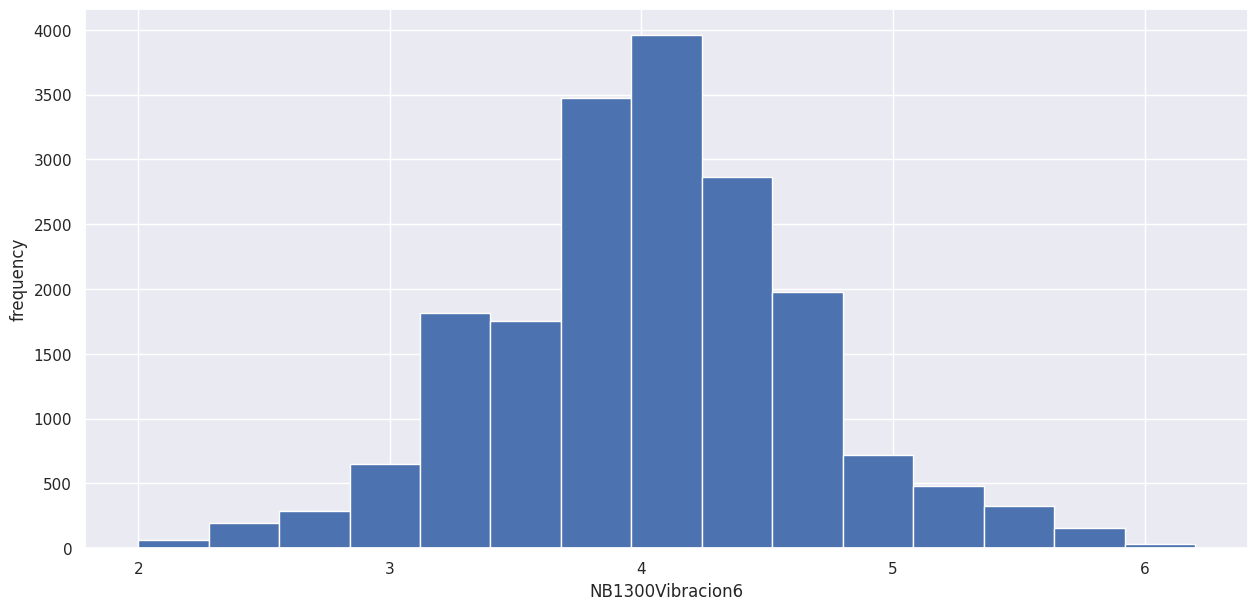

NB1300tPrec frequency


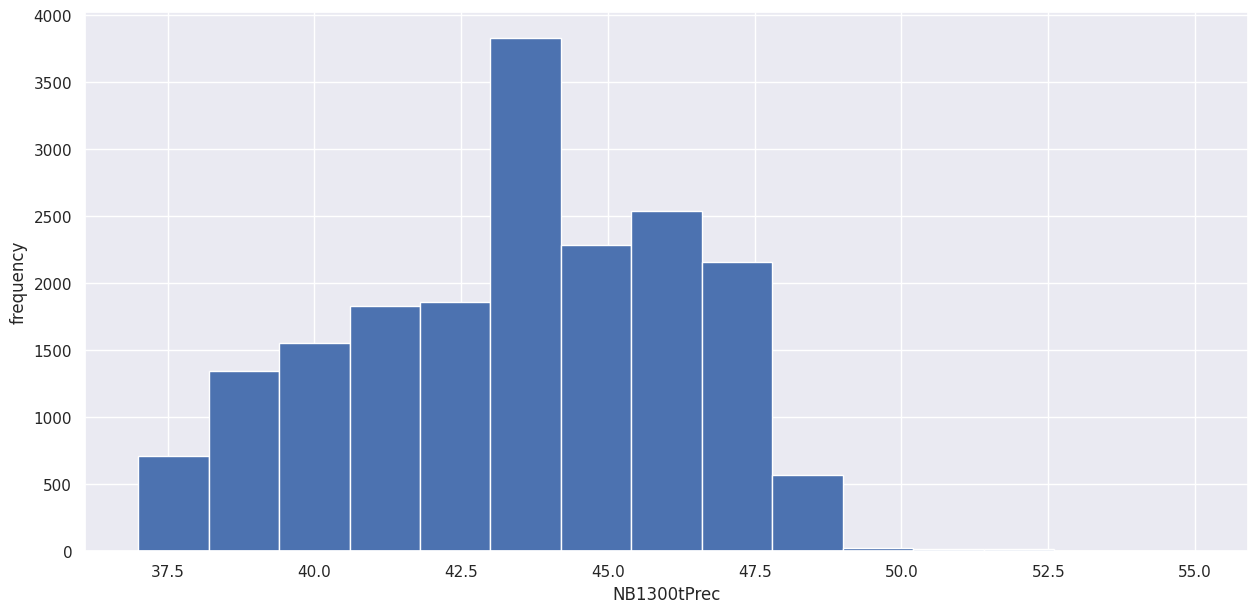

NB1300tGener frequency


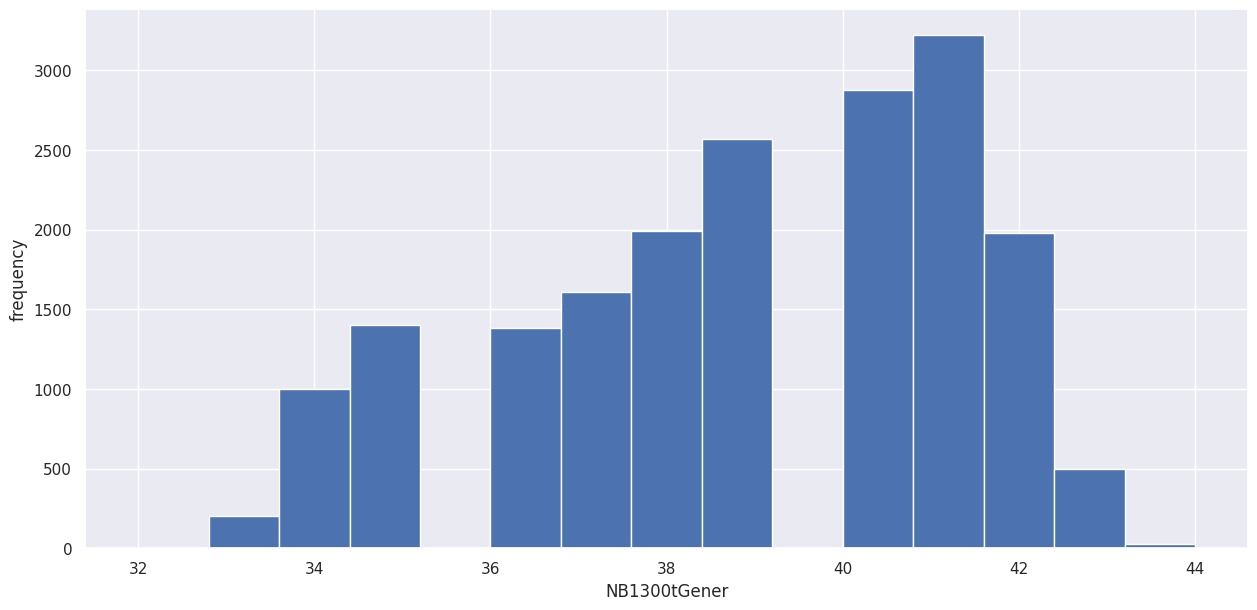

NB1300tCuarto frequency


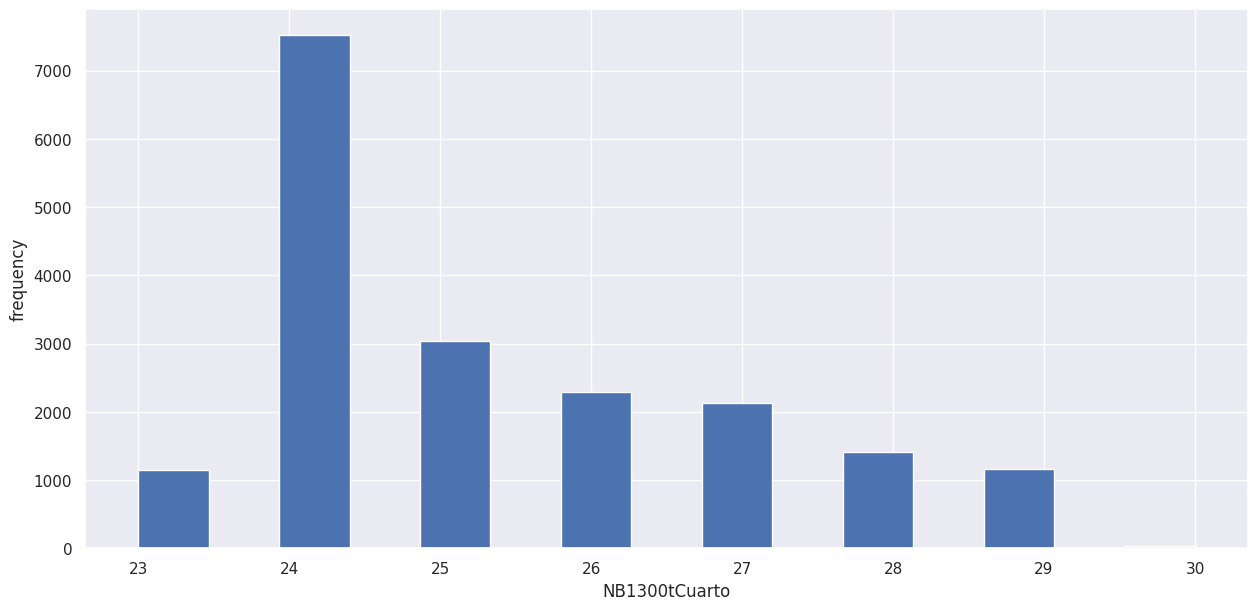

NB1300tBloque frequency


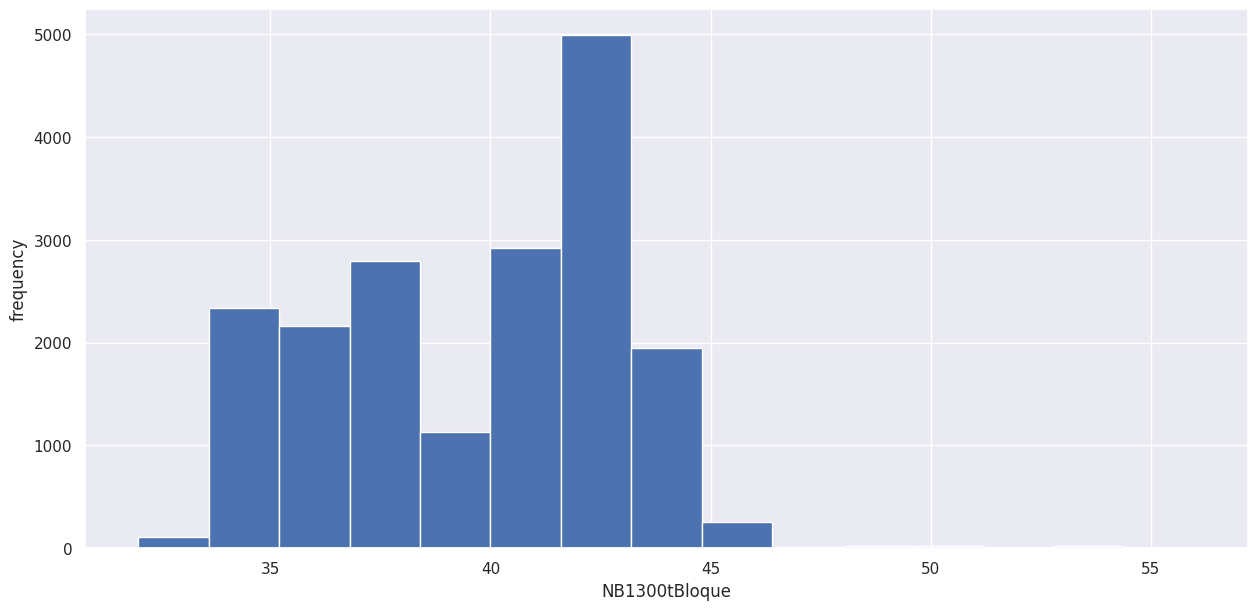

NB1300tAmbien frequency


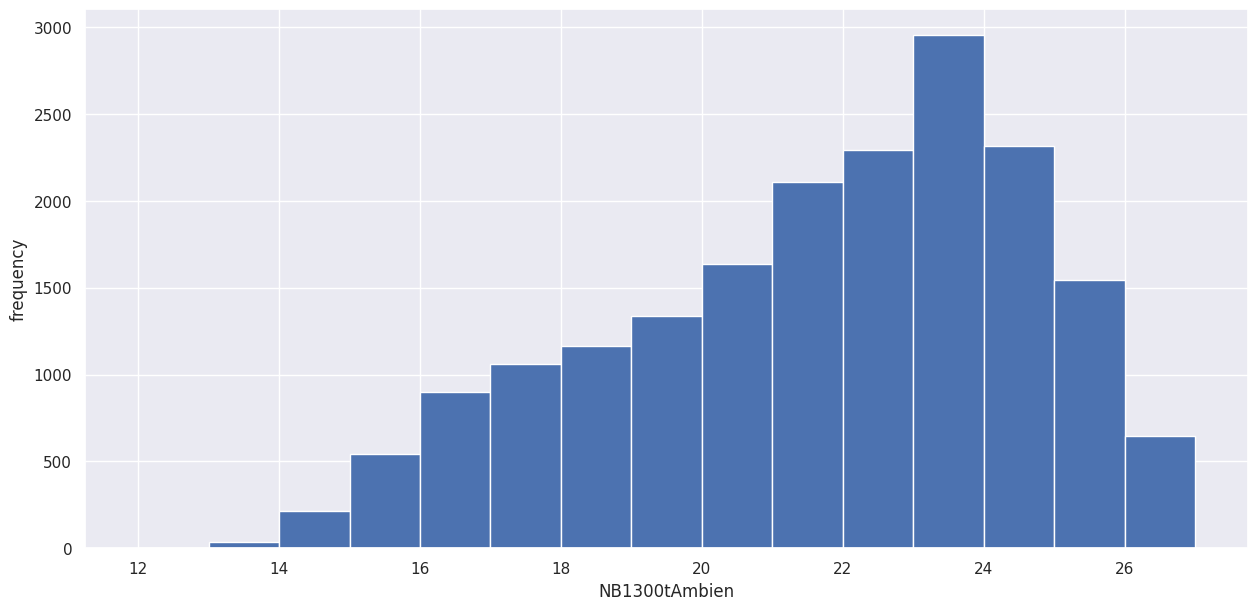

NB1300hCuarto frequency


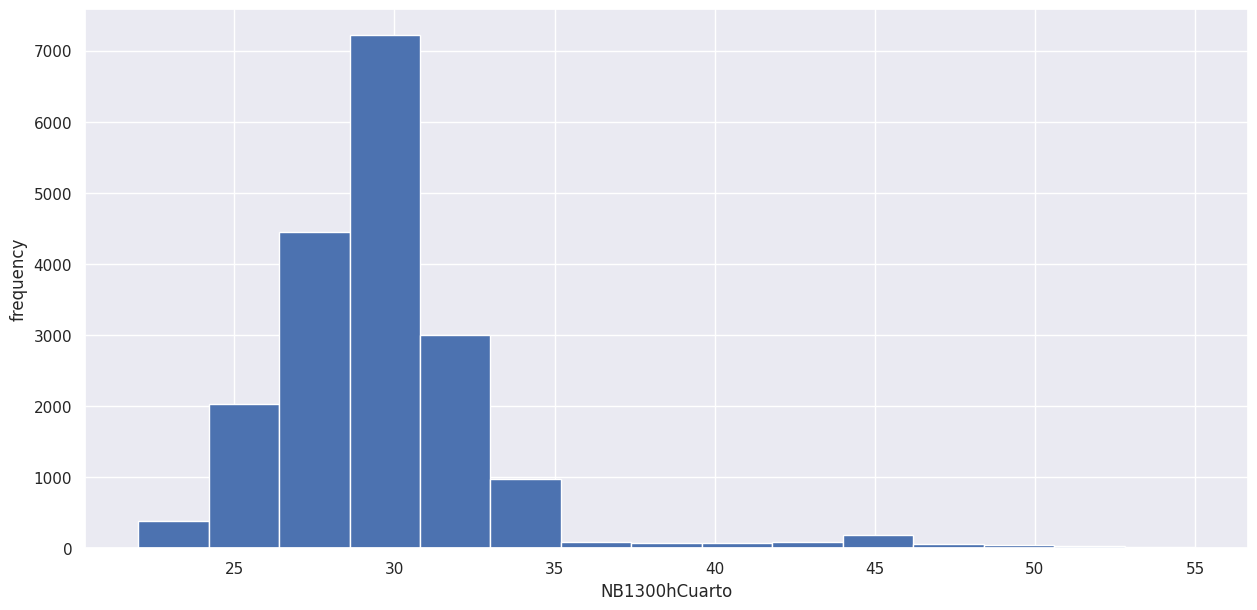

In [77]:
# Graicar la frecuencia de las señales/ Plot signal frequncy
TIME_STAMP = "Time_Stamp"
SIGNAL = [
    "NB1300Vibracion1",
    "NB1300Vibracion2",
    "NB1300Vibracion3",
    "NB1300Vibracion4",
    "NB1300Vibracion5",
    "NB1300Vibracion6",
    "NB1300tPrec",
    "NB1300tGener",
    "NB1300tCuarto",
    "NB1300tBloque",
    "NB1300tAmbien",
    "NB1300hCuarto"
]
for sensor_signal in SIGNAL:
    plot_frequency(df=real_data_df, time_stamp=TIME_STAMP,
                   signal=sensor_signal)


In [78]:
# Examinar serie temporal/ Time series examination
x1 = real_data_df['Time_Stamp']
y1 = real_data_df['NB1300Vibracion1']
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='NB1300Vibracion1'
)
data = [trace1]
layout = go.Layout(
    title='NB1300Vibracion1 Vs Time_Stamp',
    yaxis=dict(
        title='NB1300Vibracion1'
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')
